In [1]:
#XGBoost
import pandas as pd
import numpy as np

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
import xgboost as xgb

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

In [11]:
from os.path import dirname, join
from pathlib import Path
ROOT_DIR = dirname(os.path.abspath('ARCH7211-SPRING2021')) # This is your Project Root
data_PATH = join(ROOT_DIR,"data","room_info.csv")  # requires `import os`

# input data
data = pd.read_csv(r'C:\Users\milad\Documents\GitHub\arch7211-spring2021\data\room_info.csv')

In [12]:
exclusion = ["Undefined","UserDefined","Other"]
merge = {
    "Sauna": "Bath",
    "Den":'LivingRoom',
    "Library": "Office",
    "DressingRoom":'Closet'
}

data["type_cleaned"] = data["type"].apply(lambda x: merge.get(x,x))
data["exclude"] = ~data["type"].isin(exclusion)

In [13]:
data_exclude = data[~data["type"].isin(exclusion)]

In [14]:
data_exclude.groupby("type_cleaned",as_index=False).count().sort_values("type_cleaned")

,type_cleaned,path,type,classes,floor_index,num_sides,area,proportion_floor_area,perimeter,compactness,...,contains_Sink,contains_SpaceForAppliance,contains_Stove,contains_Toilet,contains_TumbleDryer,contains_Urinal,contains_WallCabinet,contains_WashingMachine,contains_WaterTap,exclude
0,Alcove,164,164,164,164,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
1,Attic,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93
2,Basement,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
3,Bath,7288,7288,7288,7288,7288,7288,7288,7288,7288,...,7288,7288,7288,7288,7288,7288,7288,7288,7288,7288
4,Bedroom,7993,7993,7993,7993,7993,7993,7993,7993,7993,...,7993,7993,7993,7993,7993,7993,7993,7993,7993,7993
5,CarPort,279,279,279,279,279,279,279,279,279,...,279,279,279,279,279,279,279,279,279,279
6,Closet,3041,3041,3041,3041,3041,3041,3041,3041,3041,...,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041
7,Dining,954,954,954,954,954,954,954,954,954,...,954,954,954,954,954,954,954,954,954,954
8,DraughtLobby,1667,1667,1667,1667,1667,1667,1667,1667,1667,...,1667,1667,1667,1667,1667,1667,1667,1667,1667,1667
9,Elevated,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [15]:
#Clean input data from the target data
# define features and predictions
X = data_exclude.drop(['path','type','classes','open_to','door_to','contains','type_cleaned','exclude'], axis =1)
y = data_exclude['type']
#Split the data into training data, and test data 
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)

In [21]:
#XGBOOST
param_dist = {'objective':'multi:softprob', 'n_estimators':400}

clf = xgb.XGBClassifier(**param_dist)
clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric= ['merror','mlogloss'],
        verbose=True)
best_iteration = clf.get_booster().best_ntree_limit
clf_pred = clf.predict(X_test, ntree_limit=best_iteration)
# evals_result = clf.evals_result()
print( classification_report(y_test,clf_pred))

7054	validation_1-mlogloss:0.44607
[123]	validation_0-mlogloss:0.07009	validation_1-mlogloss:0.44645
[124]	validation_0-mlogloss:0.06918	validation_1-mlogloss:0.44709
[125]	validation_0-mlogloss:0.06855	validation_1-mlogloss:0.44743
[126]	validation_0-mlogloss:0.06781	validation_1-mlogloss:0.44793
[127]	validation_0-mlogloss:0.06733	validation_1-mlogloss:0.44839
[128]	validation_0-mlogloss:0.06662	validation_1-mlogloss:0.44882
[129]	validation_0-mlogloss:0.06601	validation_1-mlogloss:0.44927
[130]	validation_0-mlogloss:0.06555	validation_1-mlogloss:0.44950
[131]	validation_0-mlogloss:0.06500	validation_1-mlogloss:0.44981
[132]	validation_0-mlogloss:0.06459	validation_1-mlogloss:0.45015
[133]	validation_0-mlogloss:0.06413	validation_1-mlogloss:0.45074
[134]	validation_0-mlogloss:0.06359	validation_1-mlogloss:0.45113
[135]	validation_0-mlogloss:0.06295	validation_1-mlogloss:0.45144
[136]	validation_0-mlogloss:0.06230	validation_1-mlogloss:0.45192
[137]	validation_0-mlogloss:0.06150	valid

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

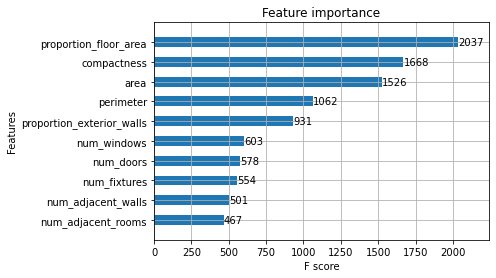

In [26]:
xgb.plot_importance(clf, ax=None, height=0.5, xlim=None, ylim=None, title='Feature importance', xlabel='F score', ylabel='Features', fmap='', importance_type='weight', max_num_features=10, grid=True, show_values=True)

In [27]:
f_import = list(zip(X_train,clf.feature_importances_))
for name,score in sorted(f_import, key = lambda x: x[1], reverse = True):
    print(name,score)

contains_Toilet 0.25818932
contains_Stove 0.25492242
contains_Shower 0.056833748
door_to_Closet 0.034882657
contains_CoatCloset 0.02855053
open_to_CarPort 0.02784398
door_to_Bath 0.026582137
num_adjacent_walls 0.023718843
contains_BaseCabinet 0.020783948
open_to_Entry 0.019062733
num_adjacent_rooms 0.017277088
open_to_Kitchen 0.016550878
open_to_Outdoor 0.014909161
num_doors 0.013543951
contains_WashingMachine 0.0131634325
contains_Closet 0.00913574
door_to_Bedroom 0.008630227
area 0.00838796
contains_SaunaStove 0.007907041
door_to_CarPort 0.006827992
num_fixtures 0.0063052024
open_to_LivingRoom 0.0061419914
door_to_Outdoor 0.0060962825
door_to_Sauna 0.0050779134
contains_Heater 0.005045943
contains_Fireplace 0.0045993594
open_to_Closet 0.004536642
contains_Refrigerator 0.0044996226
door_to_DraughtLobby 0.0043910756
num_adjacent_railings 0.004103033
num_windows 0.0040995204
door_to_Entry 0.0040536677
contains_Sink 0.0037196062
num_connected_rooms 0.0036227137
open_to_Dining 0.003452777

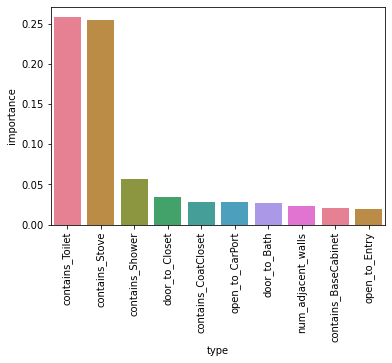

In [28]:
feat_imp = pd.DataFrame(data= {'type':[x[0] for x in f_import] , 'importance':[x[1] for x in f_import]}).sort_values('importance', ascending= False)
feat_imp
fig1 = sns.barplot(x='type',y='importance',data= feat_imp.head(10), palette=sns.color_palette("husl", 8))
plt.xticks(rotation=90)
plt.show()
# sns.lineplot((x[0] for x in f_import) , (x[1] for x in f_import) )



In [64]:
clf_pred = clf.predict(X_test)
# evals_result = clf.evals_result()
print( classification_report(y_test,clf_pred))

                precision    recall  f1-score   support

        Alcove       0.81      0.70      0.75        61
         Attic       0.79      0.41      0.54        27
      Basement       0.00      0.00      0.00        15
          Bath       0.96      0.97      0.97      2238
       Bedroom       0.82      0.93      0.87      2361
       CarPort       0.70      0.63      0.66        94
        Closet       0.90      0.92      0.91       808
           Den       0.64      0.46      0.54        91
        Dining       0.89      0.88      0.88       275
  DraughtLobby       0.91      0.91      0.91       500
  DressingRoom       0.55      0.49      0.52        83
      Elevated       0.56      0.33      0.42        27
         Entry       0.91      0.93      0.92      1237
        Garage       0.76      0.83      0.80       125
          Hall       0.55      0.19      0.28        59
       Kitchen       0.97      0.96      0.96      1362
       Library       0.00      0.00      0.00  